Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3547 - loss: 1.1617 - val_accuracy: 0.3333 - val_loss: 1.0824
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3750 - loss: 1.1157

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.3750 - loss: 1.1157 - val_accuracy: 0.3333 - val_loss: 1.0882
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3607 - loss: 1.0917 - val_accuracy: 0.6667 - val_loss: 1.0524
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - accuracy: 0.5417 - loss: 1.0567 - val_accuracy: 0.3667 - val_loss: 1.0490
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5464 - loss: 1.0125 - val_accuracy: 0.4000 - val_loss: 0.8947
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 0.5312 - loss: 0.8923 - val_accuracy: 0.5333 - val_loss: 0.8099
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5091 - loss: 0.8643 - val_accuracy: 0.5000 - val_loss: 0.7649
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.5833 - loss: 0.6827 - val_accuracy: 0.5333 - val_loss: 0.9909
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5482 - loss: 0.9045 - val_accuracy: 0.6667 - val_loss: 0.6444
Epoch 10/10
3/

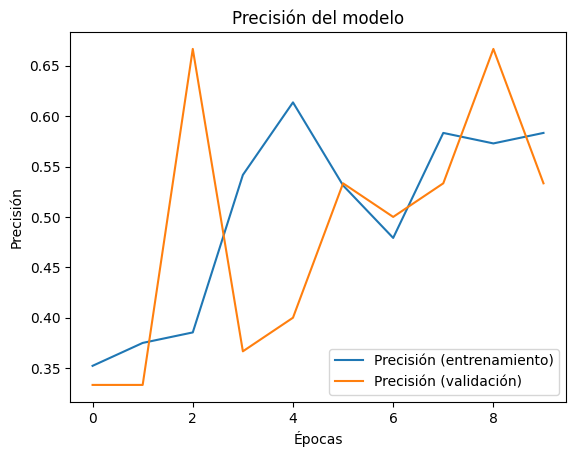

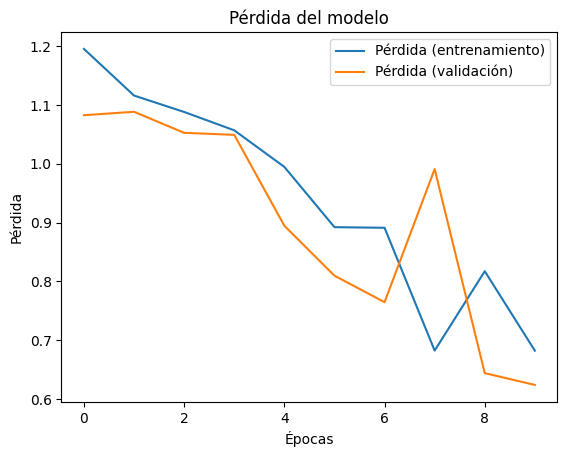

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

!pip install --upgrade tensorflow


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/aguacates',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'


validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/aguacates',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


class_labels = train_generator.classes
class_weights = class_weight.compute_class_weight('balanced',
                                                   classes=np.unique(class_labels),
                                                   y=class_labels)


class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(512, activation='relu'))


model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    class_weight=class_weight_dict
)


model.save('/content/drive/My Drive/modelo_aguacate.h5')


plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend()
plt.show()
